In [72]:
#Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#For NETCDF analysis
import xarray as xr
import cftime
import nc_time_axis

calib_year = 2012

In [75]:
# Import CLM Data
calib = xr.open_dataset('MBP-TEST2.clm2.h1.' + str(calib_year) + '-01-01-00000.nc', 
    decode_times = True)

# Convert cftime to datetime
calib = calib.convert_calendar('standard', use_cftime = False)

calib

<xarray.Dataset>
Dimensions:       (time: 365, hist_interval: 2, lndgrid: 1, levsoi: 20,
                   levgrnd: 25, levlak: 10, levdcmp: 1)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 1.0
  * time          (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Dimensions without coordinates: hist_interval, lndgrid, levsoi
Data variables: (12/27)
    mcdate        (time) float64 2.012e+07 2.012e+07 ... 2.012e+07 2.012e+07
    mcsec         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mdcur         (time) float64 365.0 366.0 367.0 368.0 ... 727.0 728.0 729.0
    mscur         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nstep         (time) float64 1.752e+04 1.757e+04 ... 3.494e+04 3.499e+04
    time_bounds   (time, hist_interval) object 2011-12-31 00:00:00 ... 2012-1...
    ...            ...
    RAIN          (time, lndgrid) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SNOW          (time, lndgrid) float32 1.762e-05 5.875e-06 ... 2.937e-06 0.0
    SOILICE       (time, levsoi, lndgrid) float32 10.19 11.14 10.0 ... 0.0 0.0
    TSA           (time, lndgrid) float32 266.0 268.9 261.2 ... 259.2 261.7
    ZWT           (time, lndgrid) float32 5.047 5.048 5.048 ... 5.697 5.701
    ZWT_PERCH     (time, lndgrid) float32 0.01 0.01 0.01 0.01 ... 0.01 0.01 0.01
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 01/26/23 18:49:41
    source:                                    Community Land Model CLM4.0
    hostname:                                  cheyenne
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          day_1
    Time_constant_3Dvars_filename:             ./MBP-TEST2.clm2.h0.2011-02-01...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

In [81]:
# Import Marcell Data
measure_all = pd.read_csv('S2_Master.csv', 
    parse_dates = ['Date'])

# Subset to calibration year
measure = measure_all[measure_all.Date.dt.year == calib_year]

measure.describe()

,Unnamed: 0,Precip,DOY,YEAR,Flow_Ls,Flow_cfs,Flow_cmday,MEF_SnowDepth_cm,Max_Temp_F,Min_Temp_F,...,Snow_in,DNR_SnowDepth_in,WTE,DepthtoFrost,FrostThickness,FrostPerc,DNR_SnowDepth_cm,FrostThickness_cm,DOWY,WYEAR
count,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,3.000000,366.000000,366.000000,...,352.000000,351.000000,366.000000,10.000000,10.00000,10.000000,351.000000,10.0000,366.000000,366.000000
mean,6391.500000,0.221721,183.500000,2012.0,0.375563,0.013263,0.033452,18.233333,54.456284,32.390710,...,0.161080,1.481481,421.821749,15.700000,7.20000,45.000000,3.762963,18.2880,182.500000,2012.251366
std,105.799338,0.537306,105.799338,0.0,1.080026,0.038141,0.096200,12.308579,23.076573,19.796162,...,0.720906,2.832278,0.127469,9.695933,6.56252,35.355339,7.193986,16.6688,105.799338,0.434392
min,6209.000000,0.000000,1.000000,2012.0,0.000000,0.000000,0.000000,7.366667,0.000000,-21.000000,...,0.000000,0.000000,421.560000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,2012.000000
25%,6300.250000,0.000000,92.250000,2012.0,0.000000,0.000000,0.000000,11.550000,34.250000,19.000000,...,0.000000,0.000000,421.692500,13.500000,3.00000,22.500000,0.000000,7.6200,91.250000,2012.000000
50%,6391.500000,0.000000,183.500000,2012.0,0.000000,0.000000,0.000000,15.733333,57.000000,33.000000,...,0.000000,0.000000,421.870000,16.500000,5.00000,35.000000,0.000000,12.7000,182.500000,2012.000000
75%,6482.750000,0.120000,274.750000,2012.0,0.110000,0.003880,0.009800,23.666667,75.000000,49.000000,...,0.000000,2.000000,421.930000,20.000000,12.25000,77.500000,5.080000,31.1150,273.750000,2012.750000
max,6574.000000,3.950000,366.000000,2012.0,8.940000,0.315720,0.796310,31.600000,94.000000,68.000000,...,8.300000,14.000000,422.020000,28.000000,20.00000,100.000000,35.560000,50.8000,365.000000,2013.000000


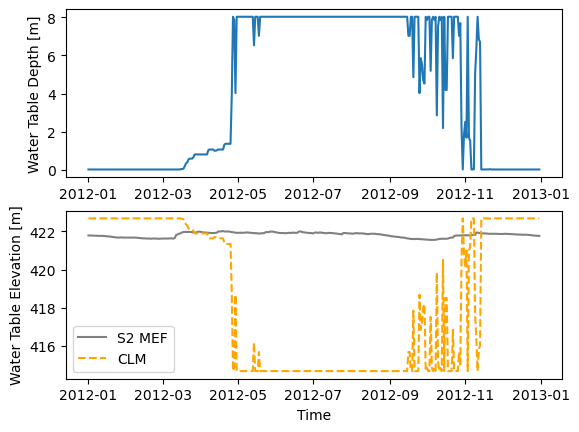

In [88]:
'''PLOTS TO CHECK'''

'''WTE'''
fig, axs = plt.subplots(2,1)

axs[0].plot(calib.time, calib.ZWT_PERCH, linestyle = '-')
axs[0].set_ylabel('Water Table Depth [m]')

axs[1].plot(measure.Date, measure.WTE, linestyle = '-', color = 'gray', label = 'S2 MEF')
axs[1].plot(calib.time, 422.7 - calib.ZWT_PERCH, linestyle = '--', color = 'orange', label = 'CLM')
axs[1].set_ylabel('Water Table Elevation [m]')
axs[1].set_xlabel('Time')

axs[1].legend()


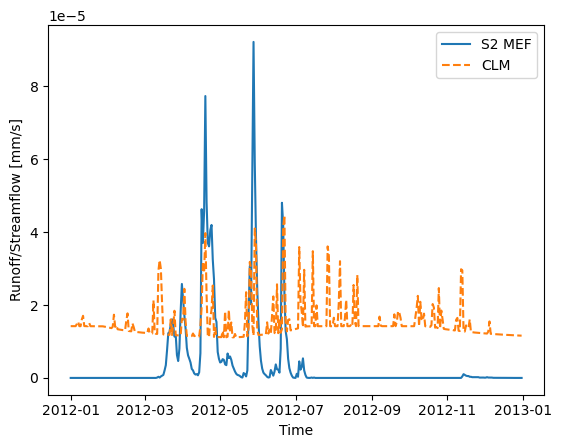

In [98]:
'''STREAMFLOW'''
cmday_to_mms = 10/(24*60*60)

fig, axs = plt.subplots(1,1)

#Precip in back
#axs2 = axs.twiny()
#axs2.plot(calib.time, calib.RAIN, color = 'grey')

#Runoff
axs.plot(measure.Date, cmday_to_mms*measure.Flow_cmday, linestyle = '-', label = 'S2 MEF')
axs.plot(calib.time, calib.QRUNOFF, linestyle = '--', label = 'CLM')
axs.set_ylabel('Runoff/Streamflow [mm/s]')
axs.set_xlabel('Time')

axs.legend()

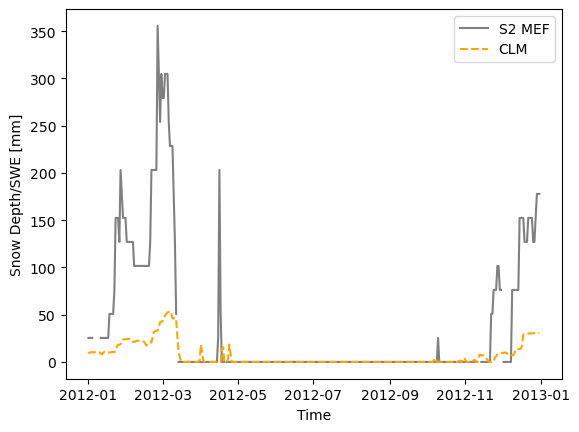

In [99]:
'''SNOW DEPTH'''
fig, axs = plt.subplots(1,1)

axs.plot(measure.Date, 10*measure.DNR_SnowDepth_cm, linestyle = '-', color = 'gray', label = 'S2 MEF')
axs.plot(calib.time, calib.H2OSNO, linestyle = '--', color = 'orange', label = 'CLM')
axs.set_ylabel('Snow Depth/SWE [mm]')
axs.set_xlabel('Time')

axs.legend()

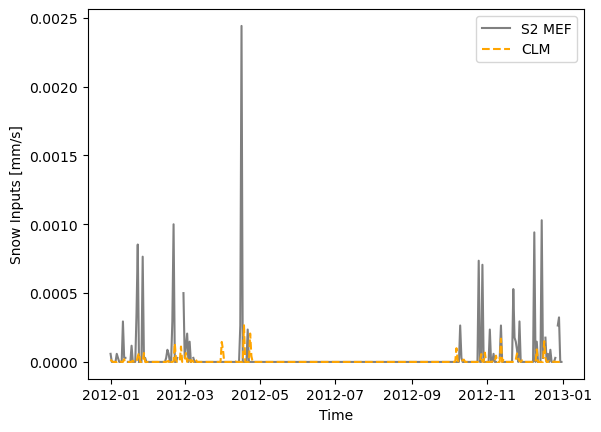

In [100]:
'''SNOW IN'''
inday_to_mms = 25.4/(24*60*60)
fig, axs = plt.subplots(1,1)

axs.plot(measure.Date, inday_to_mms*measure.Snow_in, linestyle = '-', color = 'gray', label = 'S2 MEF')
axs.plot(calib.time, calib.SNOW, linestyle = '--', color = 'orange', label = 'CLM')
axs.set_ylabel('Snow Inputs [mm/s]')
axs.set_xlabel('Time')

axs.legend()